In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('student_col_Change.csv')
df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,...,2,4,3,4,1,1,3,4,0,11
1,GP,F,U,GT3,T,at_home,other,course,father,no,...,2,5,3,3,1,1,3,2,9,11
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,...,2,4,3,2,2,3,3,6,12,13
3,GP,F,U,GT3,T,health,services,home,mother,no,...,3,3,2,2,1,1,5,0,14,14
4,GP,F,U,GT3,T,other,other,home,father,no,...,2,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,...,3,5,4,2,1,2,5,4,10,11
645,MS,F,U,LE3,T,teacher,services,course,mother,no,...,2,4,3,4,1,1,1,4,15,15
646,MS,F,U,GT3,T,other,other,course,mother,no,...,2,1,1,1,1,1,5,6,11,12
647,MS,M,U,LE3,T,services,services,course,mother,no,...,1,2,4,5,3,4,2,6,10,10


In [3]:
df = df[df['age'] == 16]
df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
4,GP,F,U,GT3,T,other,other,home,father,no,...,2,4,3,2,1,2,5,0,11,13
5,GP,M,U,LE3,T,services,other,reputation,mother,no,...,2,5,4,2,1,2,5,6,12,12
6,GP,M,U,LE3,T,other,other,home,mother,no,...,2,4,4,4,1,1,3,0,13,12
15,GP,F,U,GT3,T,health,other,home,mother,no,...,1,4,4,4,1,2,2,6,17,17
16,GP,F,U,GT3,T,services,services,reputation,mother,no,...,3,3,2,3,1,2,2,10,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,MS,F,R,LE3,T,other,services,course,father,no,...,2,5,4,3,1,1,1,0,11,13
564,MS,M,R,GT3,T,services,other,course,father,no,...,1,4,5,5,2,3,5,2,11,9
565,MS,M,R,LE3,T,at_home,other,course,mother,no,...,1,4,5,5,2,4,5,0,10,10
570,MS,M,R,GT3,T,services,services,course,mother,no,...,1,5,4,3,2,4,4,6,7,8


In [31]:
### Dalc, Walc에 따른 veryLow, Low, other 열 추가

def classify_Alc(row):
    
    if row['Dalc'] <= 2 and row['Walc'] <= 2:
        if row['Dalc'] == 1 and row['Walc'] == 1:
            return 'Very Low'
        else:
            return 'Low'
    else:
        return 'Other'

df['classify_Alc'] = df.apply(classify_Alc, axis = 1)

C:\Users\Daylight\AppData\Local\Temp\ipykernel_21232\2864531220.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classify_Alc'] = df.apply(classify_Alc, axis = 1)


In [5]:
columns = list(df.columns)
columns.remove('Dalc')
columns.remove('Walc')
columns.remove('age')
columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'G1',
 'G2',
 'classify_Alc']

In [32]:
def set_grouped(df_, col):
    grouped = df_.groupby([col, 'classify_Alc']).size().unstack()
    grouped_ratio = grouped.div(grouped.sum(axis = 1), axis = 0)
    return grouped_ratio

def draw_barplot(groupRatio, a, b):
    groupRatio.plot.bar(stacked = True, ax = axes[a, b])

def setTitle(location, col):
    location.set_title(col)
    
def draw_boxplot(df_, X, Y):
    sns.boxplot(x = X, y = Y, data = df)
    plt.xlabel(X)
    plt.ylabel(Y)

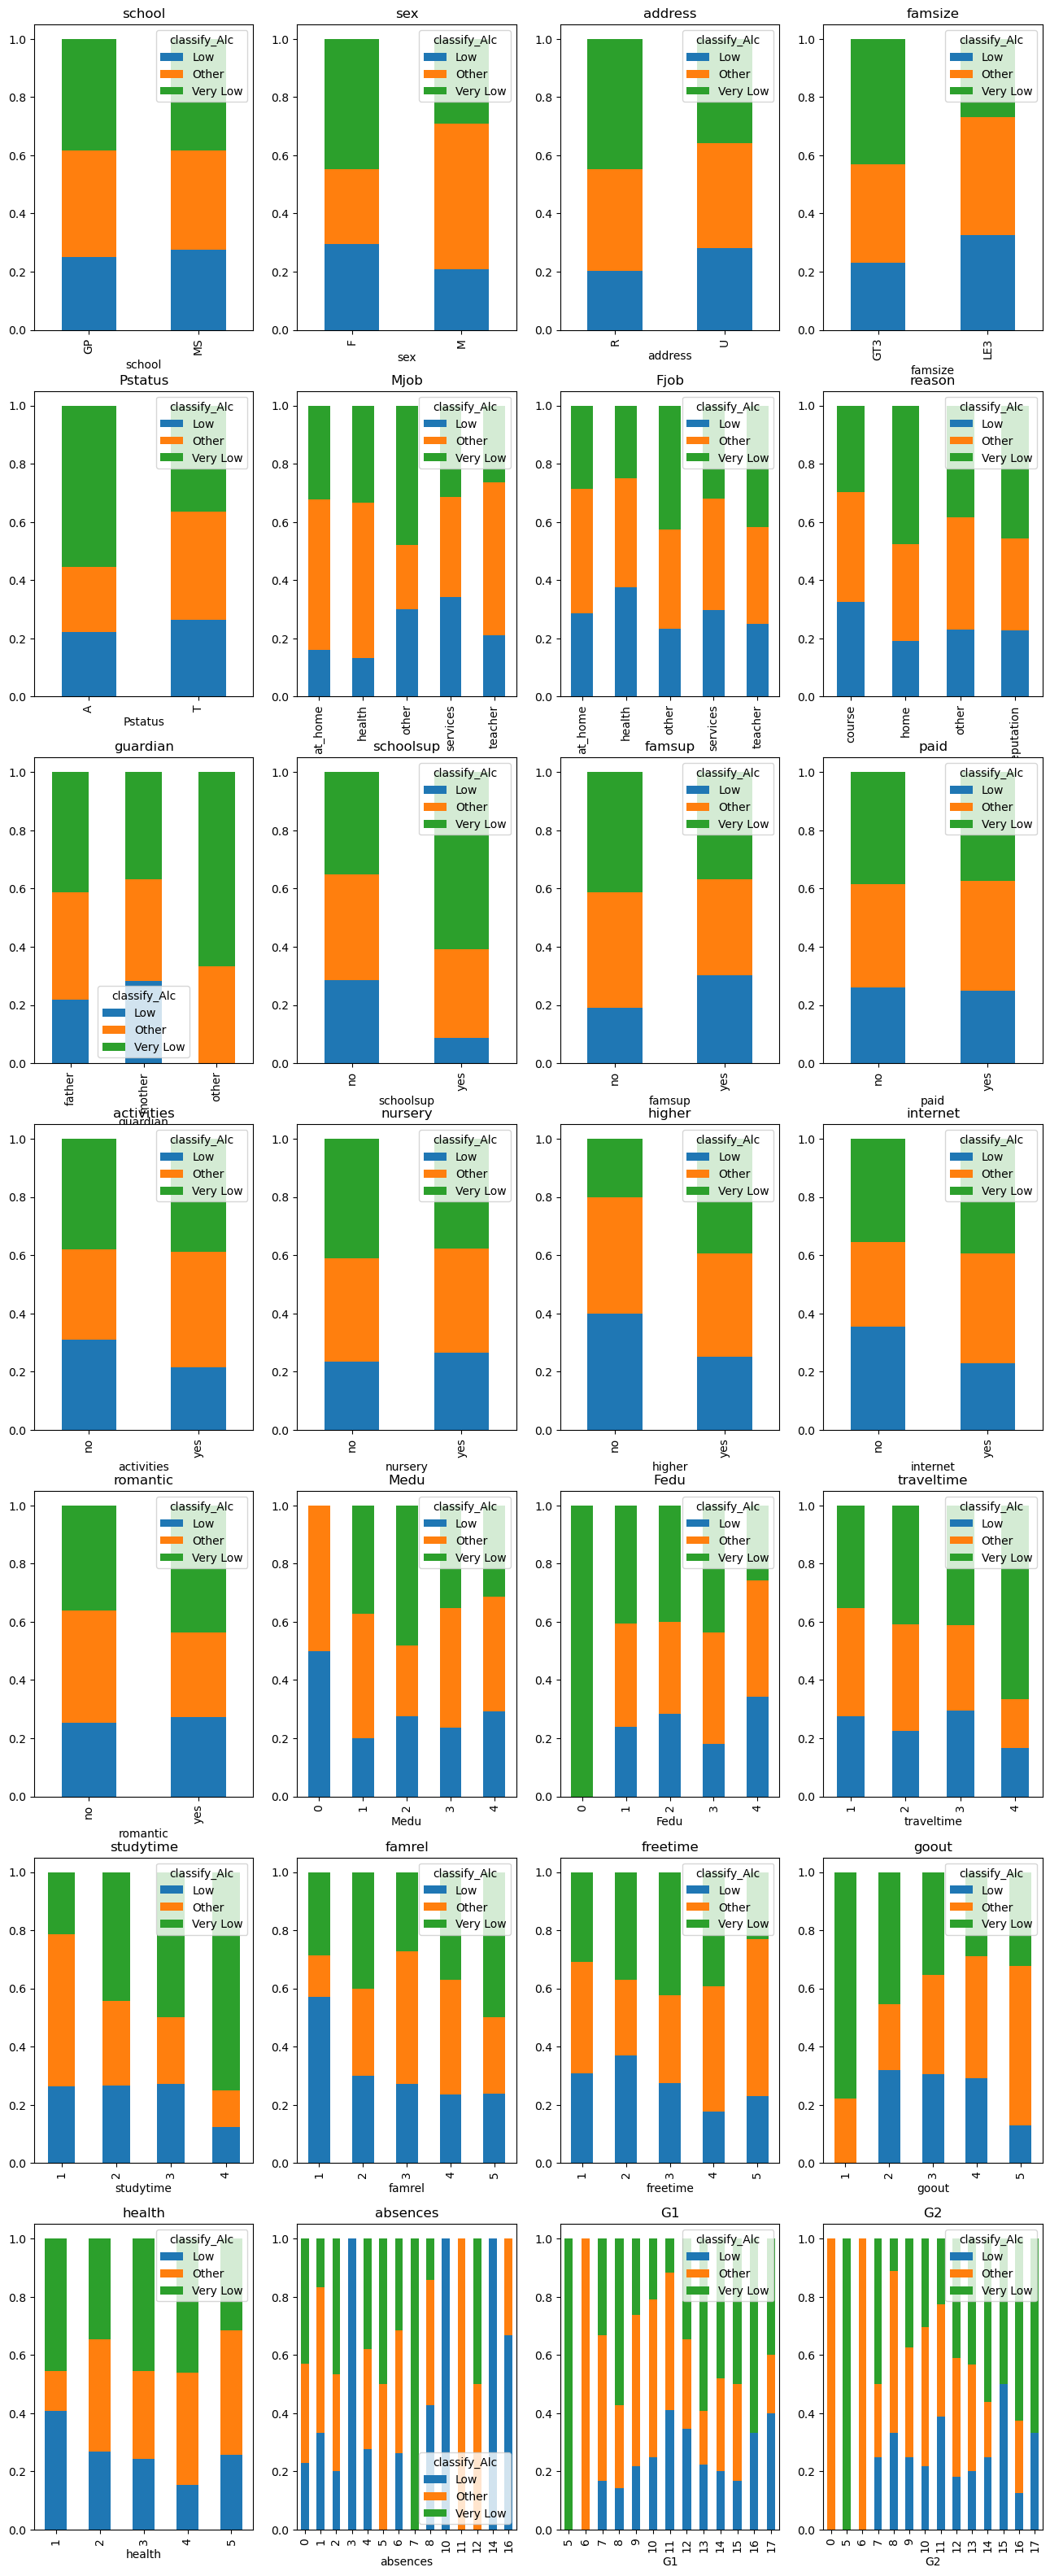

In [33]:
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

In [47]:
df_A = df[df['Pstatus'] == 'A']    # 18개
df_T = df[df['Pstatus'] == 'T']    # 159개
df_YesSchoolsup = df[df['schoolsup'] == 'yes'] # 23개
df_NoSchoolsup = df[df['schoolsup'] == 'no']   # 154개
df_YesHigher = df[df['higher'] == 'yes']       # 167개
df_NoHigher = df[df['higher'] == 'no']         # 10개

df_father = df[df['guardian'] == 'father']    # 46개
df_mother = df[df['guardian'] == 'mother']    # 128개
df_other = df[df['guardian'] == 'other']    # 3개

df_R = df[df['address'] == 'R']    # 49개
df_U = df[df['address'] == 'U']    # 128개

df_GT3 = df[df['famsize'] == 'GT3']    # 125개
df_LE3 = df[df['famsize'] == 'LE3']    # 52개

In [46]:
print(len(df_A), len(df_T), len(df_YesSchoolsup), len(df_NoSchoolsup), len(df_YesHigher), len(df_NoHigher), len(df_father), len(df_mother), len(df_other))
print(len(df_R), len(df_U), len(df_GT3), len(df_LE3))

18 159 23 154 167 10 46 128 3
49 128 125 52


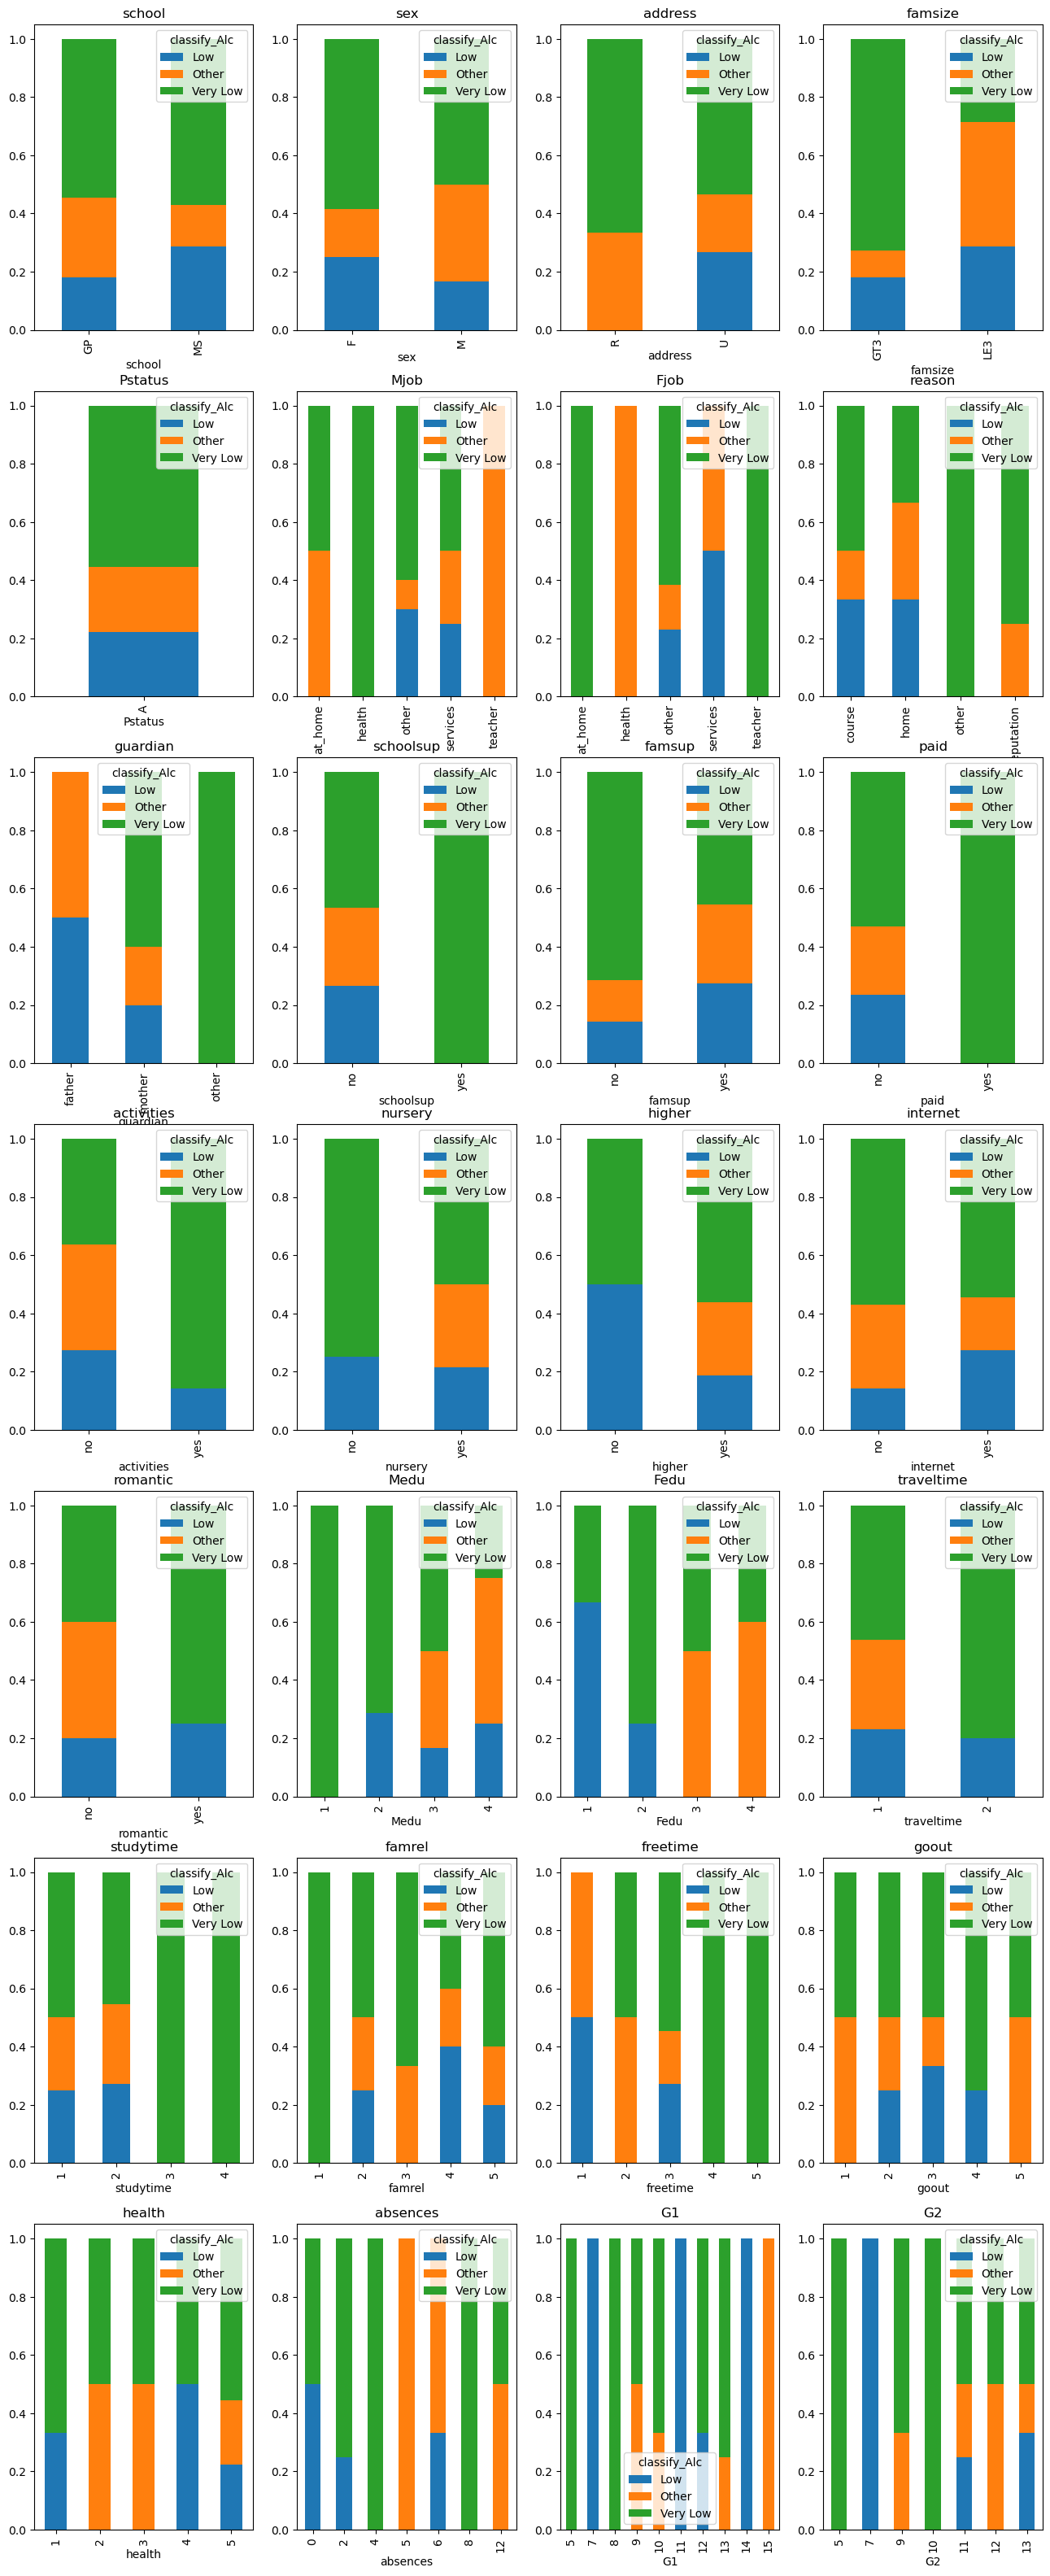

In [38]:
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_A, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

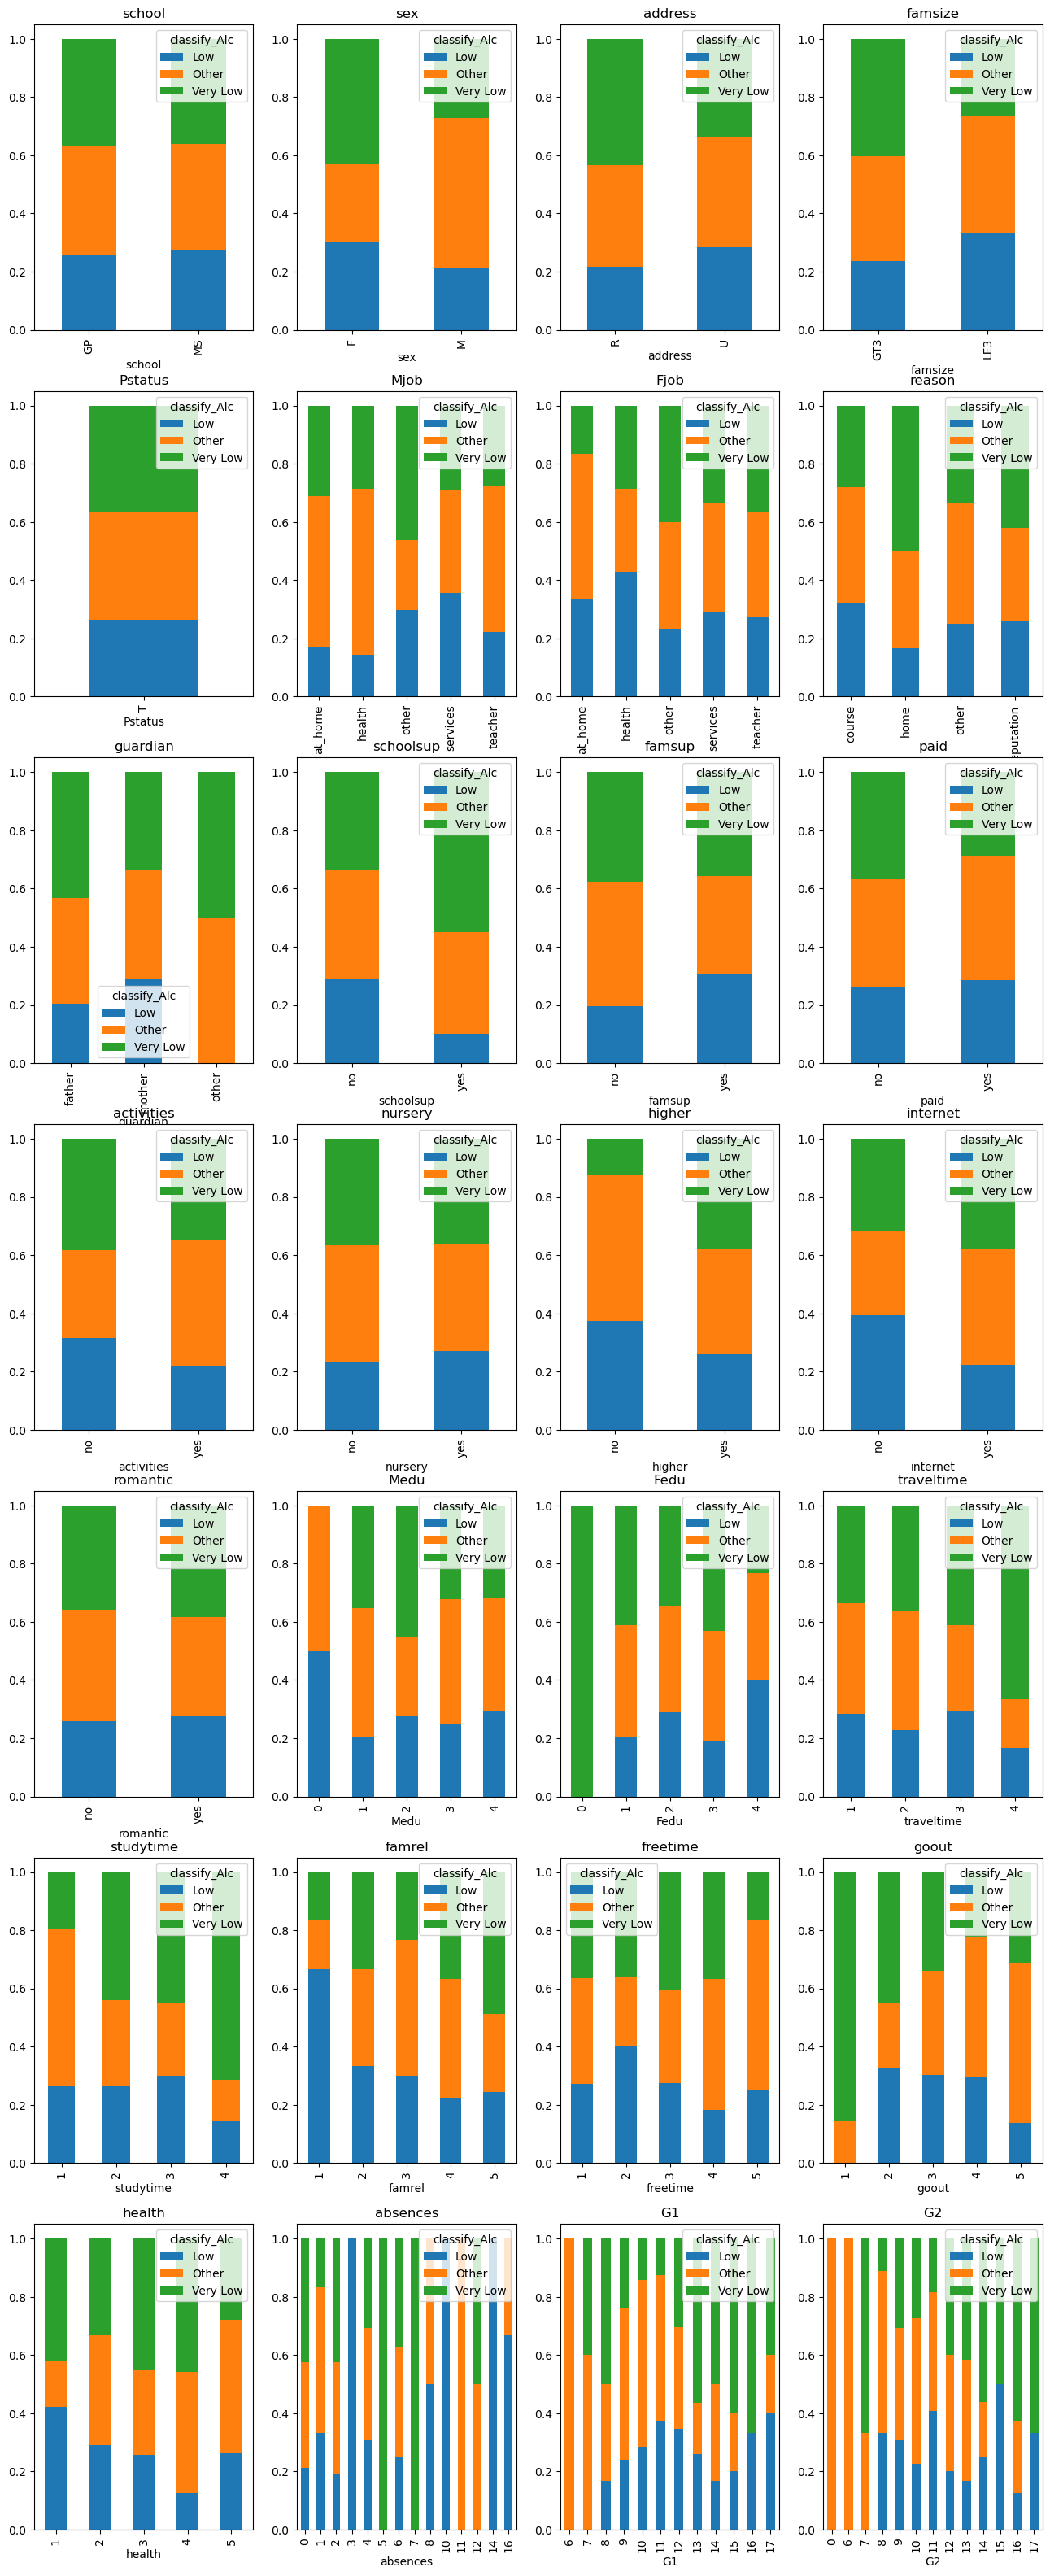

In [49]:
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_T, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

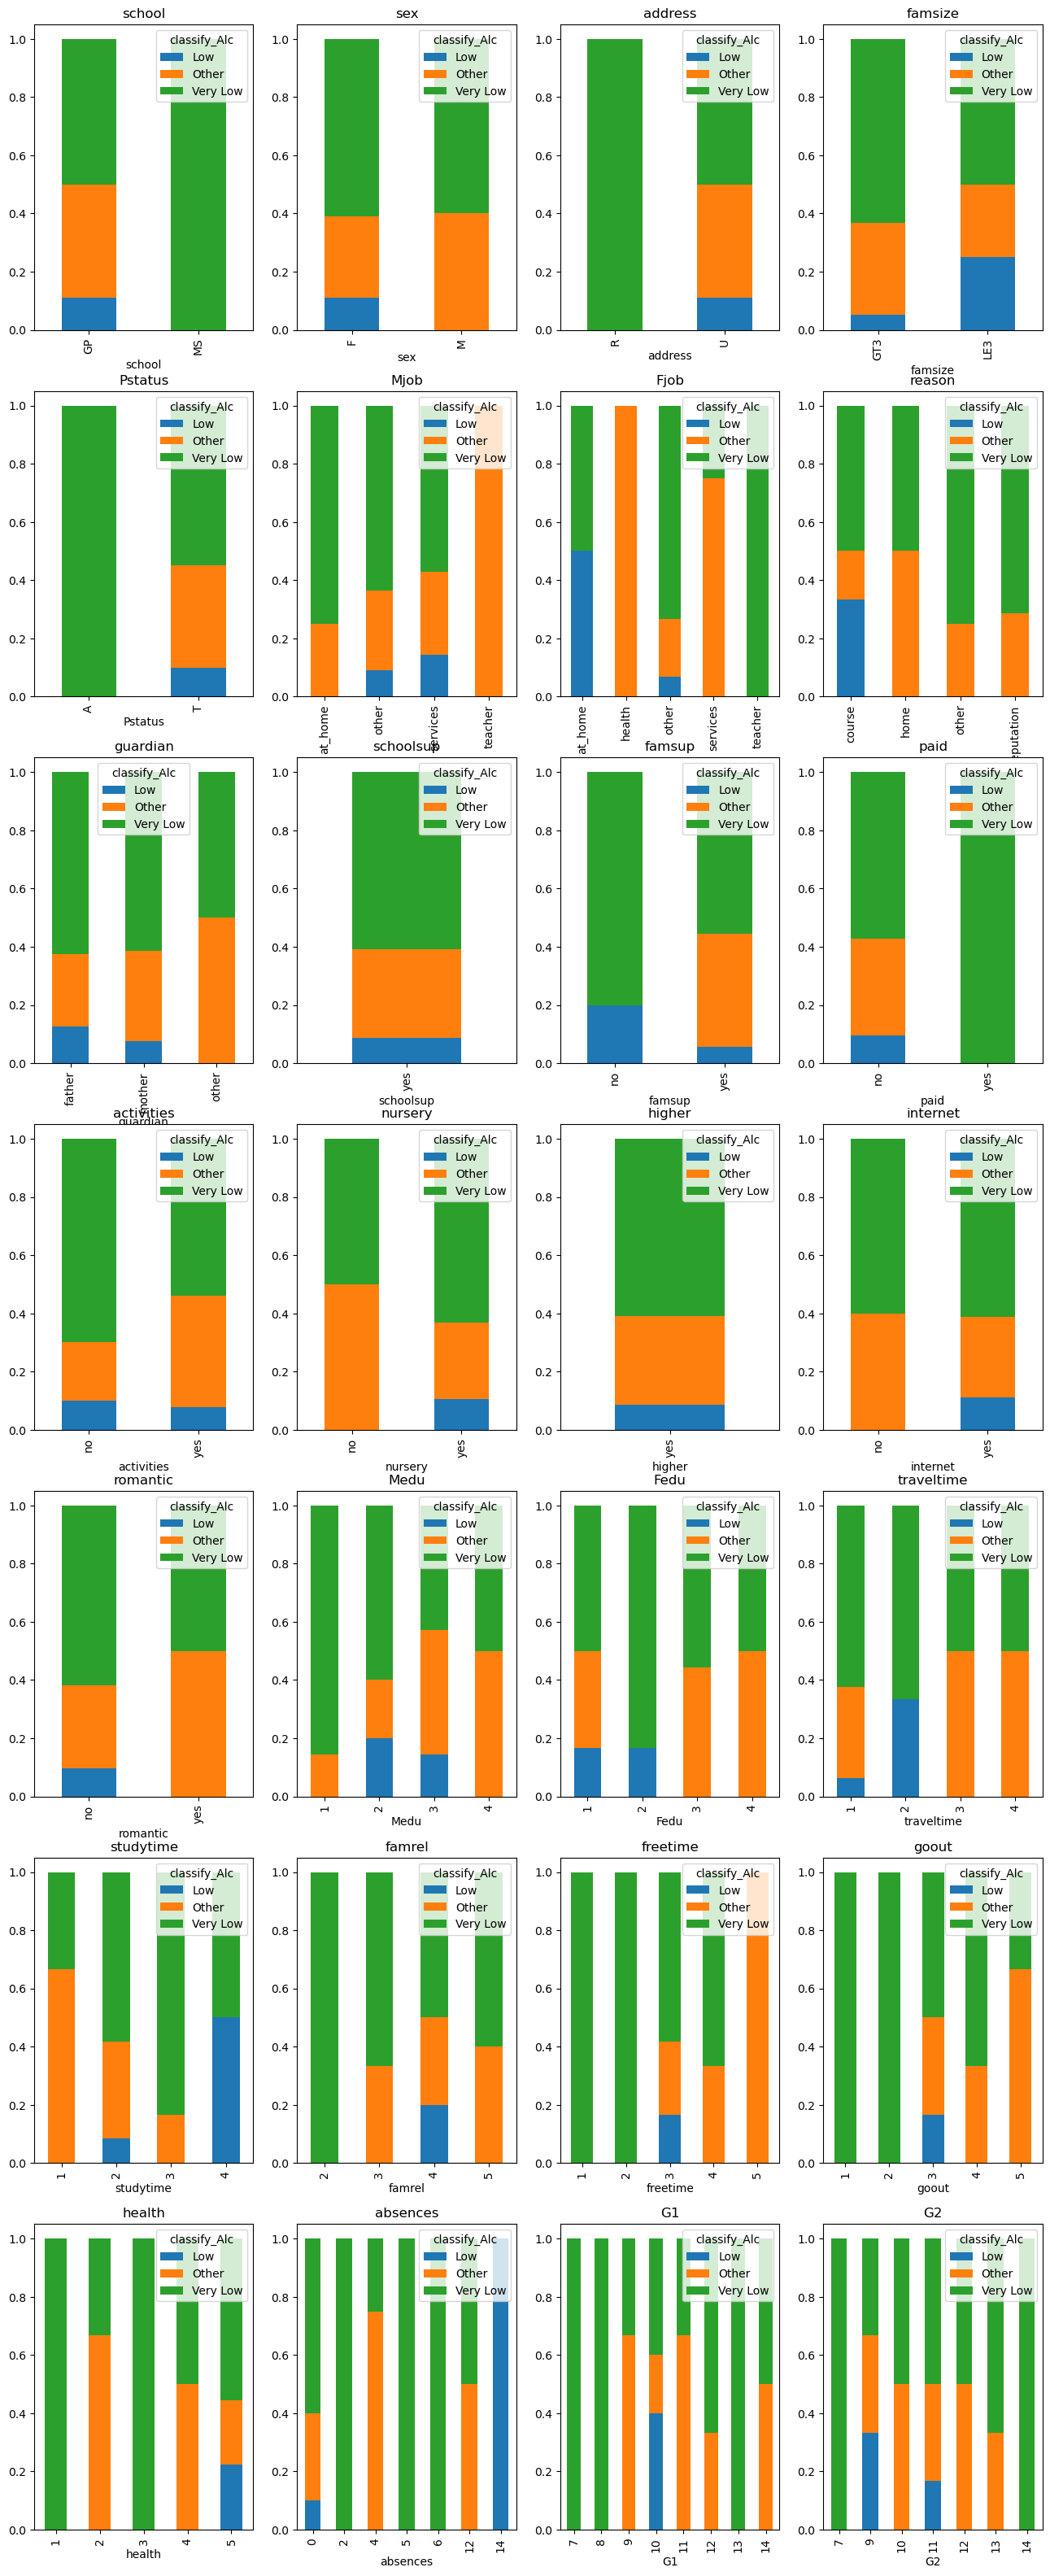

In [50]:
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_YesSchoolsup, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

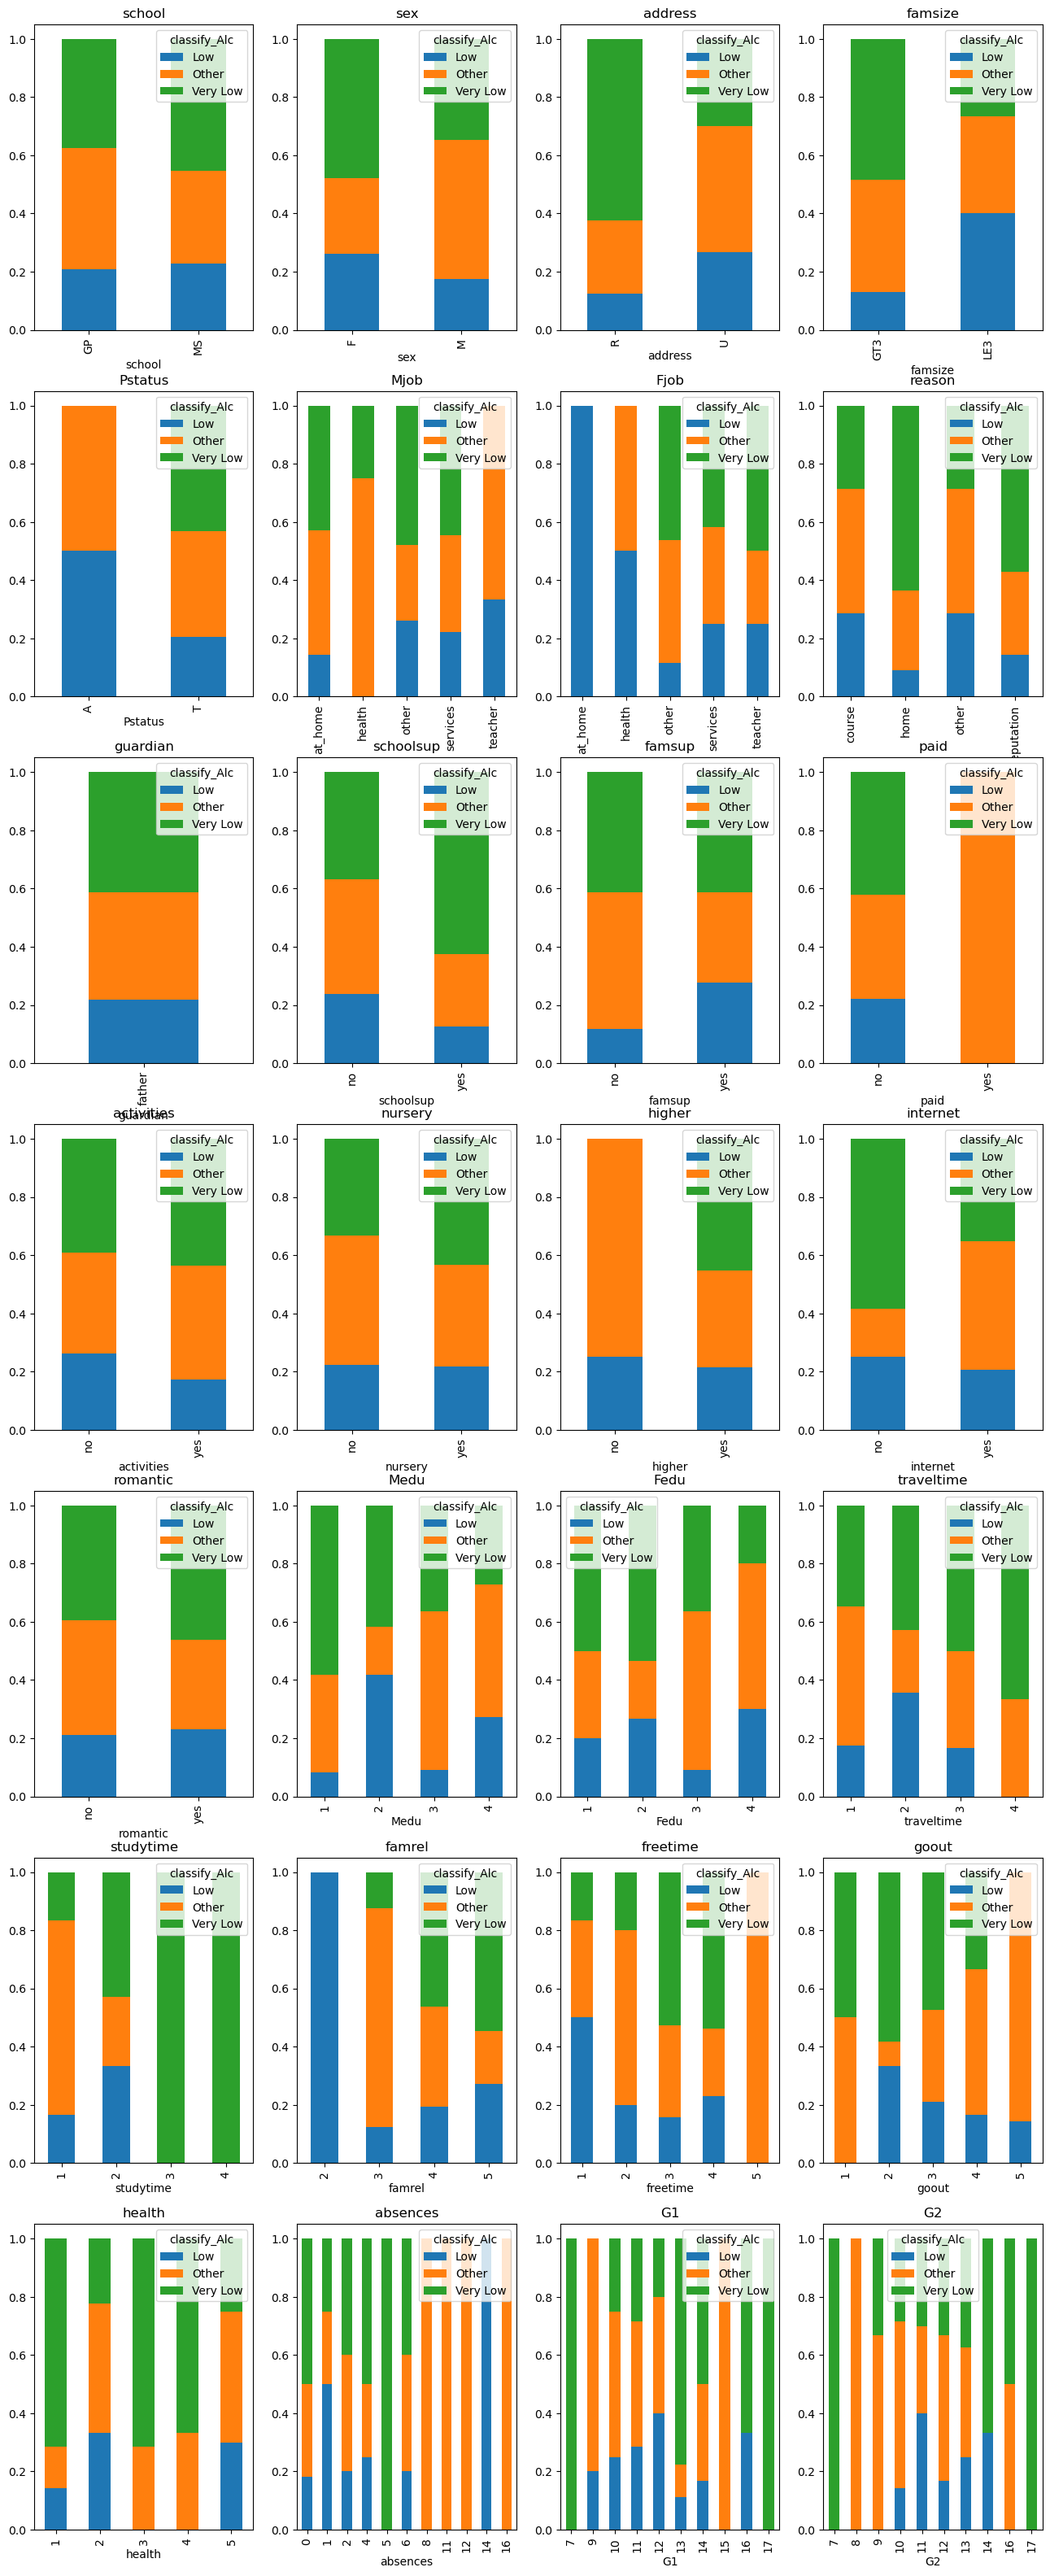

In [51]:
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_father, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

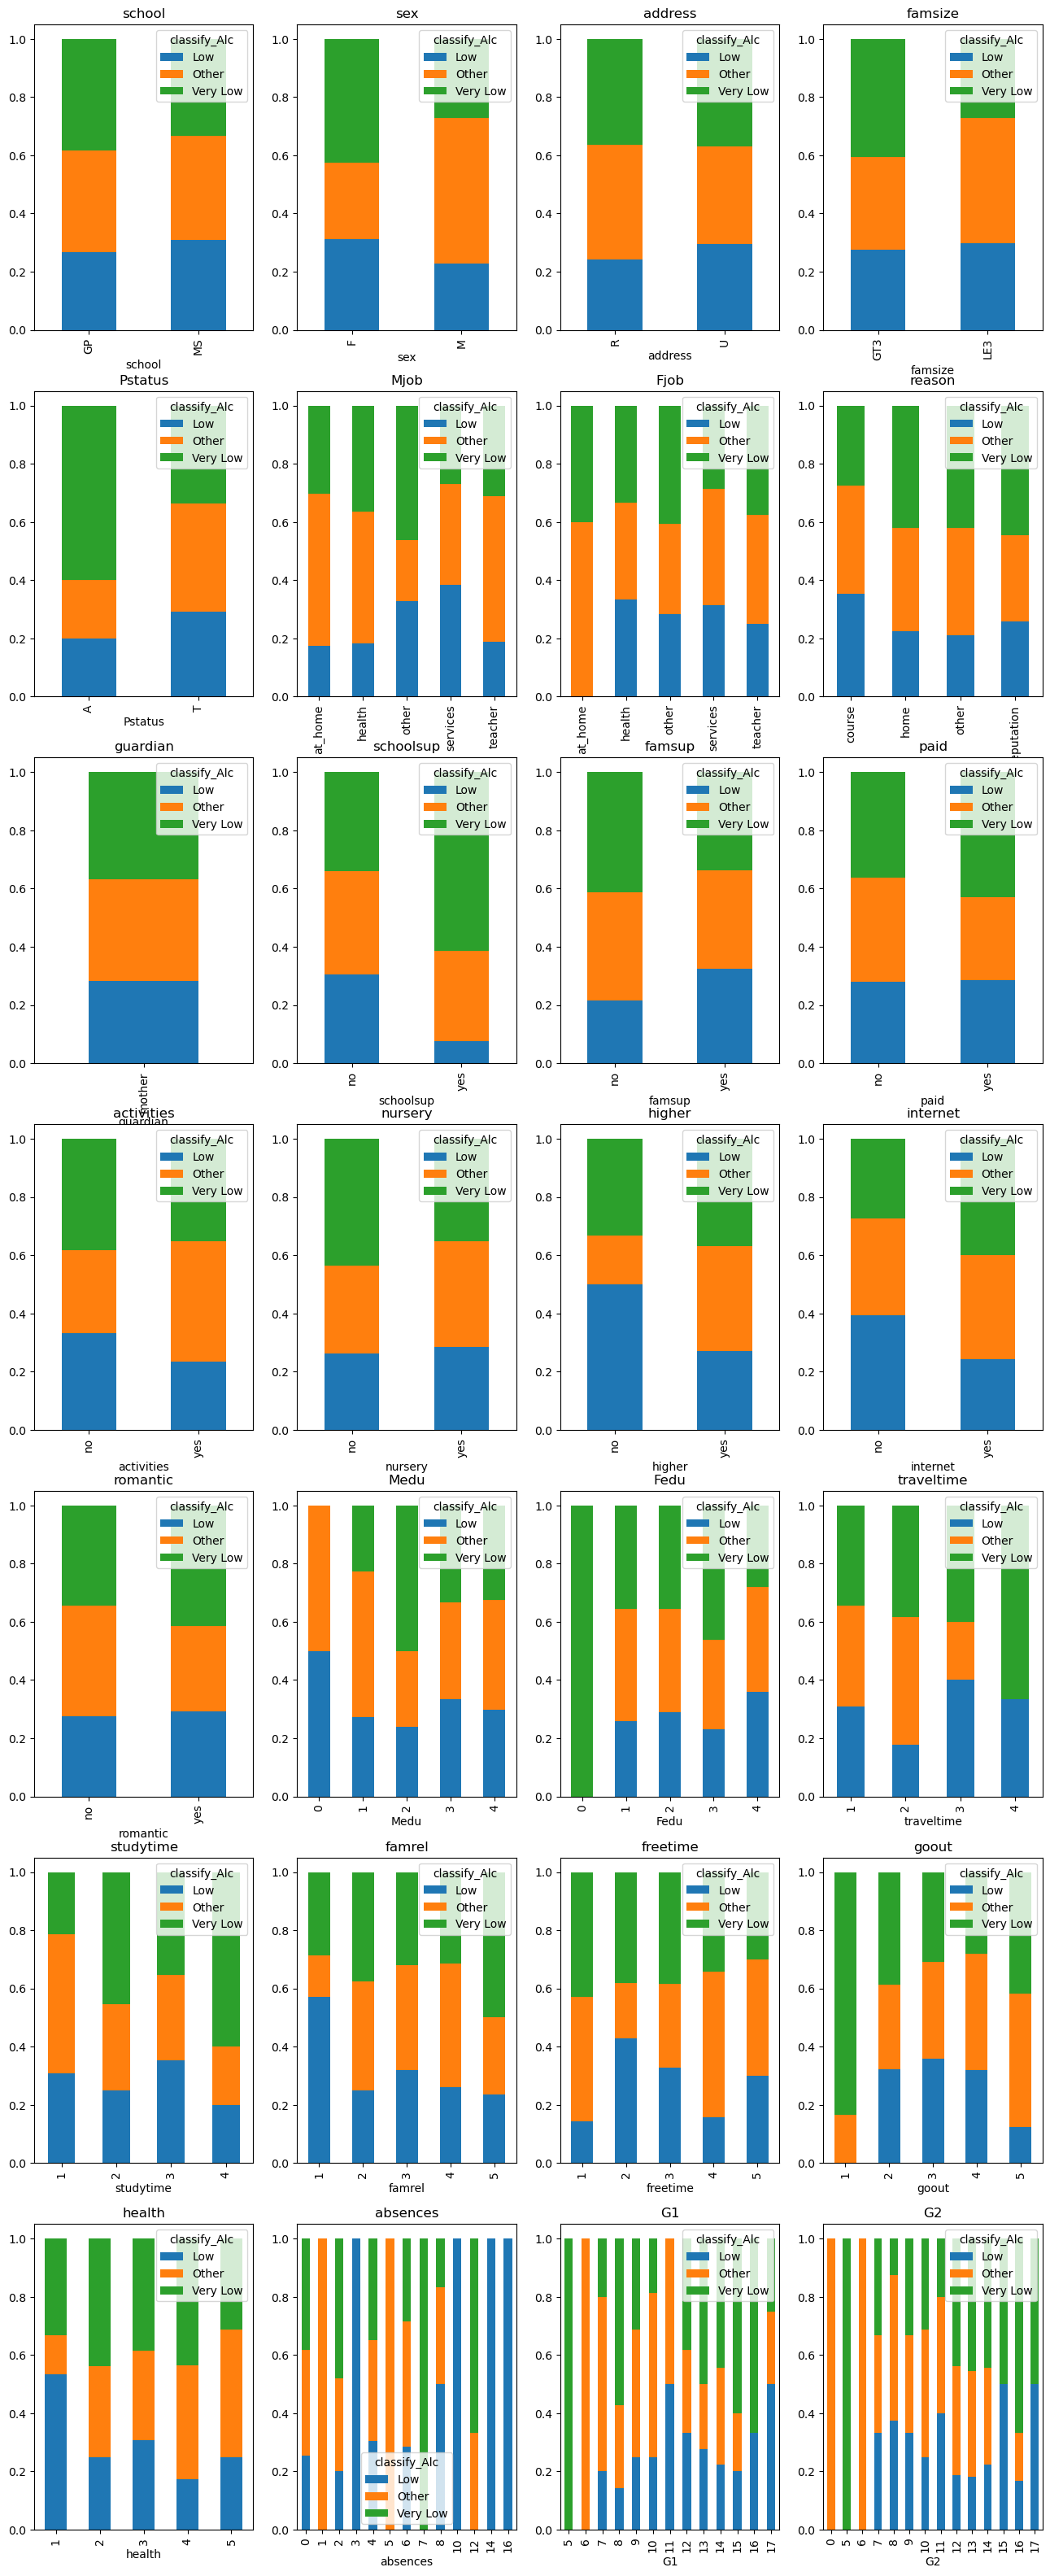

In [52]:
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_mother, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

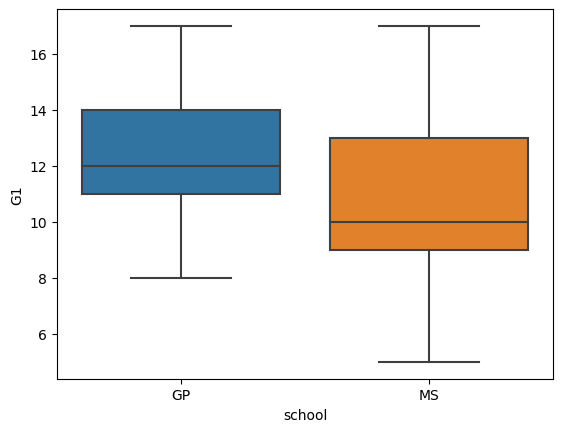

In [53]:
draw_boxplot(df, 'school', 'G1')

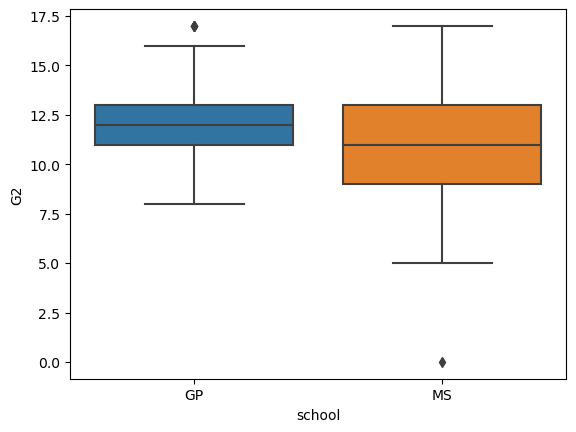

In [54]:
draw_boxplot(df, 'school', 'G2')

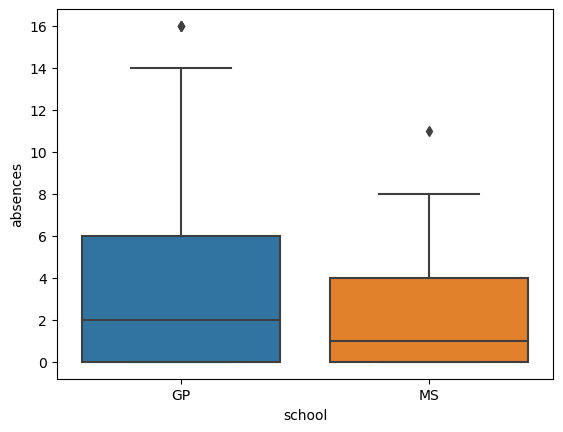

In [55]:
draw_boxplot(df, 'school', 'absences')

<Axes: xlabel='classify_Alc', ylabel='absences'>

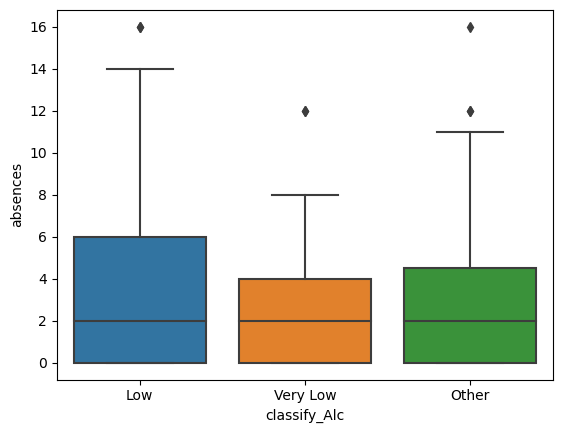

In [57]:
sns.boxplot(x = 'classify_Alc', y = 'absences', data = df)

<Axes: xlabel='classify_Alc', ylabel='G1'>

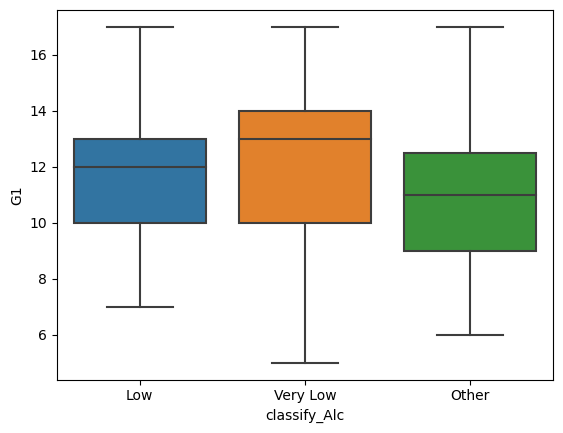

In [58]:
sns.boxplot(x = 'classify_Alc', y = 'G1', data = df)

<Axes: xlabel='classify_Alc', ylabel='G2'>

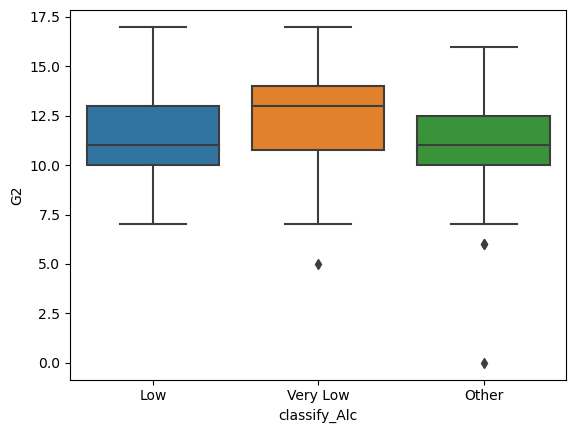

In [59]:
sns.boxplot(x = 'classify_Alc', y = 'G2', data = df)

In [66]:
df_gradeDown = df[(df['G1'] - df['G2']) > 0]    # 성적이 떨어진 사람
df_gradeUP = df[(df['G1'] - df['G2']) < 0]    # 성적이 떨어진 사람

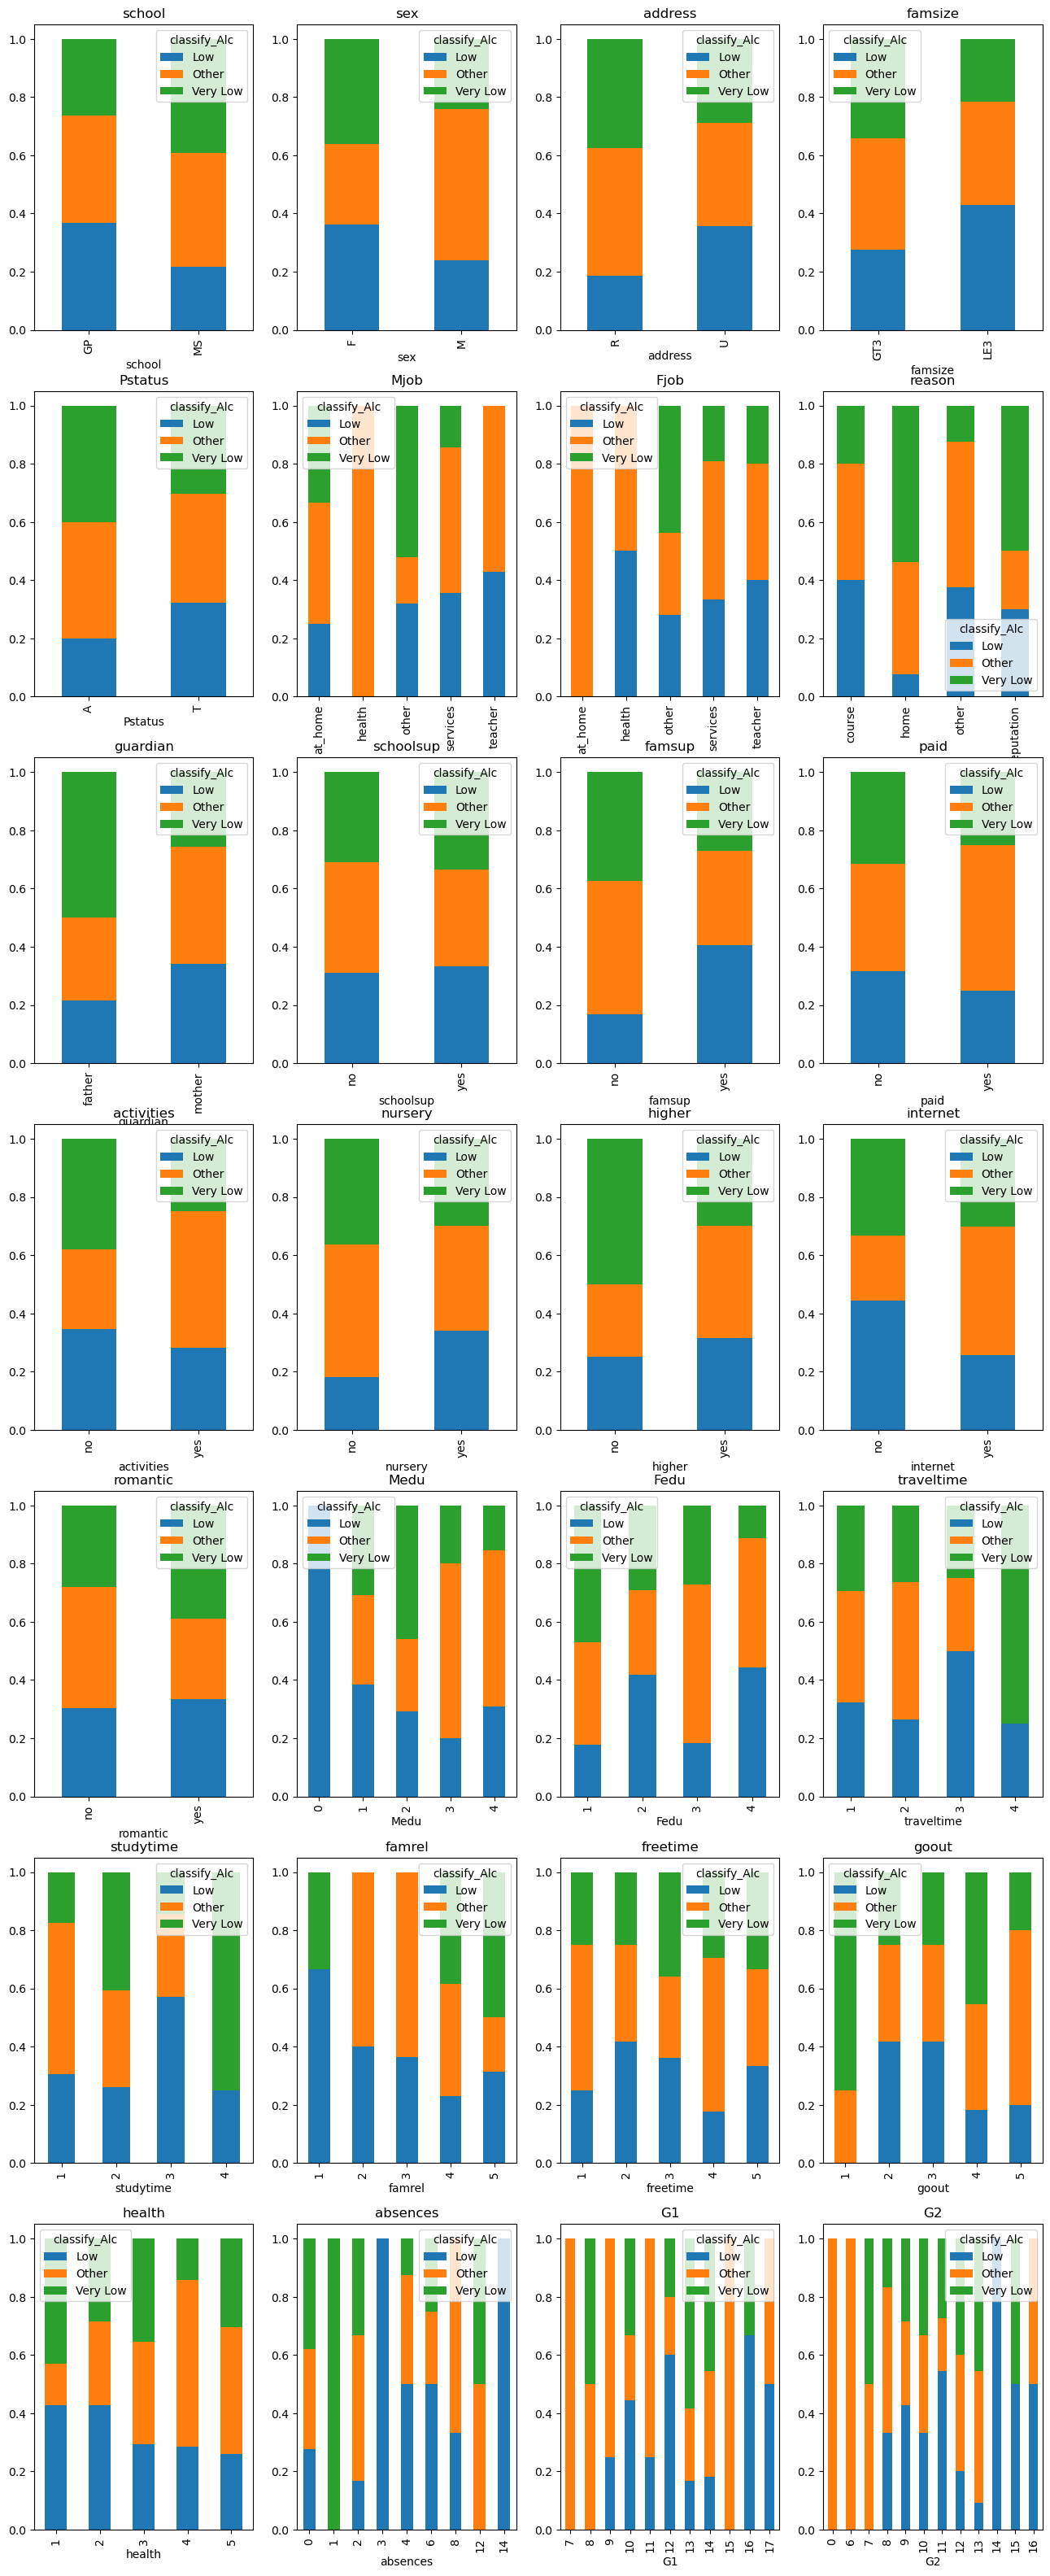

In [67]:
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_gradeDown, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

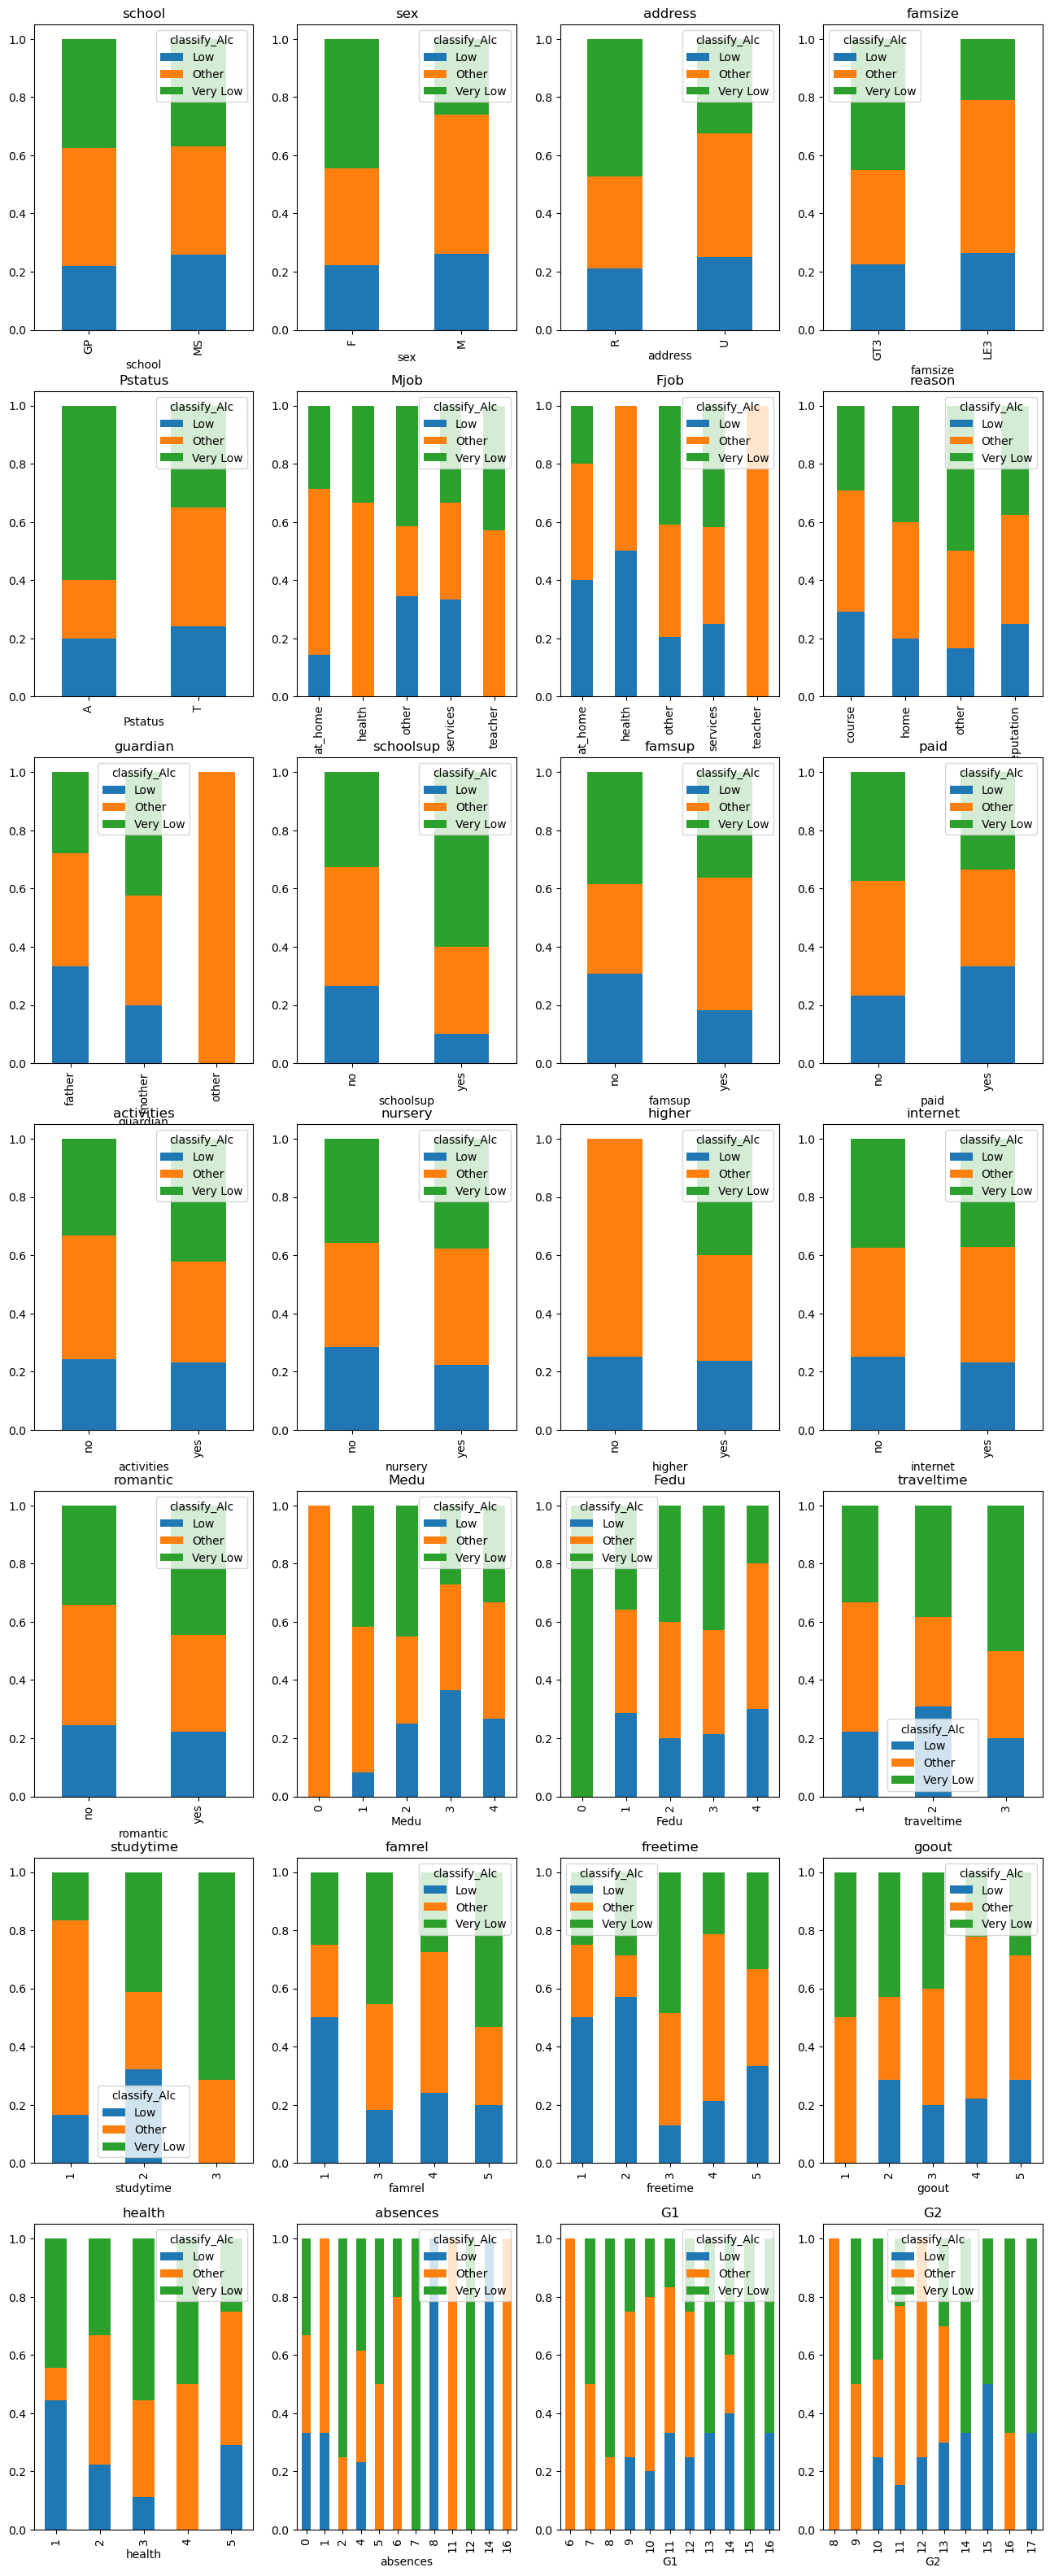

In [68]:
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_gradeUP, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)